In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from script.machine_learning_model import *
from sklearn.ensemble import ExtraTreesRegressor
import seaborn as sns
from scipy import stats

In [2]:
feat, target, data = data_load("conv", data_opt = True)
plt.rcParams['font.size'] = 12#文字のサイズ
plt.rcParams['font.family']= 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']#フォント
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.grid']= False
plt.rcParams['grid.linestyle']='--'
plt.rcParams['grid.linewidth'] = 2
plt.rcParams["legend.markerscale"] = 2
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = 'black'
idx = (feat.loc[:,"Li":'Pechini method'].round().duplicated(keep='first') == False)
original = data.loc[:,"Nr of publication":'Pechini method'].loc[idx]
original.index = np.arange(len(original))

model = ExtraTreesRegressor(n_estimators = 500, random_state = 1126, n_jobs = -1)
model.fit(feat, target)

idx = (data.loc[:,'Temperature, K'].duplicated(keep='first') == False)
temp = data.loc[idx, 'Temperature, K']
print("the number of temperture:", temp.shape)

idx = (data.loc[:,'p(CH4)/p(O2)'].duplicated(keep='first') == False)
part = data.loc[idx, 'p(CH4)/p(O2)']
print("the number of Pressure:", part.shape)
idx = (data.loc[:,'p total, bar'].duplicated(keep='first') == False)
total = data.loc[idx, 'p total, bar']
print("the number of total pressure:",total.shape)

idx = (data.loc[:,'Contact time, s'].duplicated(keep='first') == False)
cont = data.loc[idx, 'Contact time, s']
print("the number of contact time:",cont.shape)

the number of temperture: (343,)
the number of Pressure: (265,)
the number of total pressure: (31,)
the number of contact time: (730,)


In [3]:
sub = []
for p in part:
    for c in cont:
        tmp = original.loc[:,'Li':]
        tmp.loc[:,'Temperature, K'] = 800 +273.15
        tmp.loc[:,'p(CH4)/p(O2)'] = p
        tmp.loc[:,'p total, bar'] = 1
        tmp.loc[:,'Contact time, s'] = c
        pred = model.predict(tmp)
        sub.append(pred)
        
sub = np.array(sub).mean(axis = 0)

In [4]:
cond = pd.DataFrame(columns = ['Promotor','Preparetion' ])
for i in range(len(original)):
    
    tmp = original.loc[i, 'Impregnation':'SGS']
    idx = (tmp == 1)
    if idx.any():
        cond.loc[i, 'Preparetion'] = str(tmp.loc[idx].index[0])
    else:
        cond.loc[i, 'Preparetion' ] = 'n.a'

In [5]:
cat = pd.DataFrame()
for i in range(len(original)):
    tmp = original.loc[i,'Li':'Bi']
    cat.loc[i,'Nr of publication'] = original.loc[i,'Nr of publication']
    idx = tmp > 0
    for n in range((idx == True).sum()):
        name = str(tmp.loc[idx].index[n])
        cat.loc[i,'Element %i'%(n+1)] = name
        cat.loc[i,'C %i'%(n+1)] = original.loc[i,name]

In [6]:
cat.loc[:,'Potential Yield'] = sub
cat.to_csv('out/potential_yields.csv')

In [7]:
idx = (original.loc[:,'W']> 0) & (original.loc[:,'Mn'] > 0)
w_mn = cat.loc[idx]
print("Mn/W",w_mn.shape)

idx = (original.loc[:,'Li']> 0) & (original.loc[:,'Mg'] > 0)
li_mg = cat.loc[idx]
print("Li/Mg",li_mg.shape)

idx = (original.loc[:,'La']> 0) 
la = cat.loc[idx]
print("La", la.shape)


idx1 = ((original.loc[:,'W']> 0) & (original.loc[:,'Mn'] > 0))
idx2 = (original.loc[:,'Li']> 0) & (original.loc[:,'Mg'] > 0)
idx3 = (original.loc[:,'La']> 0)
idx = (idx1 == False) | (idx2 == False) |(idx3 == False) 
others = cat.loc[idx]
others.shape

Mn/W (214, 18)
Li/Mg (154, 18)
La (291, 18)


(1986, 18)

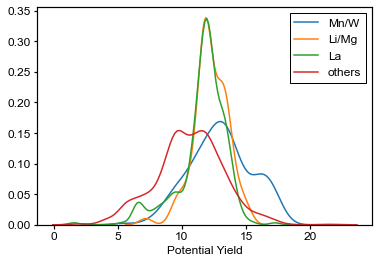

In [8]:
ax = sns.distplot(a=w_mn.loc[:,'Potential Yield'], hist = False, label = 'Mn/W')
ax = sns.distplot(a=li_mg.loc[:,'Potential Yield'], hist = False, label = 'Li/Mg')
ax = sns.distplot(a=la.loc[:,'Potential Yield'], hist = False, label = 'La')
ax = sns.distplot(a=others.loc[:,'Potential Yield'], hist = False, label = 'others')


ax.legend()
plt.savefig('out/Figure_9.png', dpi = 1200)

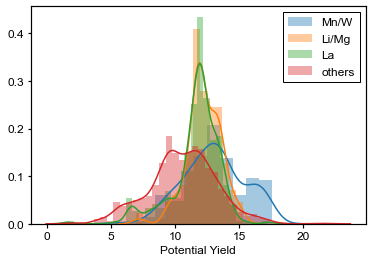

In [9]:
ax = sns.distplot(a=w_mn.loc[:,'Potential Yield'],label = 'Mn/W')
ax = sns.distplot(a=li_mg.loc[:,'Potential Yield'], label = 'Li/Mg')
ax = sns.distplot(a=la.loc[:,'Potential Yield'],  label = 'La')
ax = sns.distplot(a=others.loc[:,'Potential Yield'],label = 'others')


ax.legend()
plt.savefig('out/Figure_9_sub.png', dpi = 1200)

In [10]:
dat

NameError: name 'dat' is not defined